<a href="https://colab.research.google.com/github/Varkenes/Tensorflow-Keras-Niebla/blob/main/C%C3%B3digo_100_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/BBDD_Niebla-Paihuen_100%25.csv')

In [ ]:
print(df)

       N     T (°C)     HR (%)  ...        Vy  Nubosidad(%)  Flujo (L/día)
0      1  15.041667  69.770833  ... -0.184534             5           0.00
1      2  16.743750  59.864583  ... -0.180783             5           0.00
2      3  17.709375  54.604167  ...  0.172621             5           0.00
3      4  15.230208  67.843750  ...  0.191184             8           0.00
4      5  18.077083  58.989583  ... -0.080333             5           0.00
..   ...        ...        ...  ...       ...           ...            ...
207  208  14.383333  75.562500  ...  0.501016             6           0.01
208  209  13.112500  83.854167  ...  0.294262            25           0.00
209  210  16.731111  66.711111  ...  0.576676            65           0.00
210  211  12.839130  80.956522  ...  0.004677            39           0.37
211  212  10.527083  78.250000  ...  0.459126             5           0.01

[212 rows x 9 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[ 1.00000000e+00  1.50416667e+01  6.97708333e+01 ... -1.84534479e-01
   5.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  1.67437500e+01  5.98645833e+01 ... -1.80783401e-01
   5.00000000e+00  0.00000000e+00]
 [ 3.00000000e+00  1.77093750e+01  5.46041667e+01 ...  1.72621211e-01
   5.00000000e+00  0.00000000e+00]
 ...
 [ 2.10000000e+02  1.67311111e+01  6.67111111e+01 ...  5.76675865e-01
   6.50000000e+01  0.00000000e+00]
 [ 2.11000000e+02  1.28391304e+01  8.09565217e+01 ...  4.67674200e-03
   3.90000000e+01  3.70000000e-01]
 [ 2.12000000e+02  1.05270833e+01  7.82500000e+01 ...  4.59126421e-01
   5.00000000e+00  1.00000000e-02]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,1:8]
Y=dataset[:,8]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[ 1.50416667e+01  6.97708333e+01  1.01723125e+03 ... -7.14372345e-01
  -1.84534479e-01  5.00000000e+00]
 [ 1.67437500e+01  5.98645833e+01  1.01619062e+03 ... -6.64064322e-01
  -1.80783401e-01  5.00000000e+00]
 [ 1.77093750e+01  5.46041667e+01  1.01132292e+03 ... -6.14967441e-01
   1.72621211e-01  5.00000000e+00]
 ...
 [ 1.67311111e+01  6.67111111e+01  1.00583542e+03 ... -6.65922301e-01
   5.76675865e-01  6.50000000e+01]
 [ 1.28391304e+01  8.09565217e+01  1.00748958e+03 ... -1.31528799e+00
   4.67674200e-03  3.90000000e+01]
 [ 1.05270833e+01  7.82500000e+01  1.00980208e+03 ... -7.51812167e-01
   4.59126421e-01  5.00000000e+00]]


In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.14 0.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.
 0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.04 1.97 0.02
 0.   2.49 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.06 0.
 0.   0.   0.   0.12 0.   0.   2.81 1.55 0.   0.   0.   0.   0.   0.
 0.   0.   0.74 0.1  0.   0.   0.   0.   0.33 0.   0.69 0.   0.   0.
 0.   0.   0.   0.   0.02 0.   0.   1.55 0.   0.   0.   0.   0.   0.
 0.01 0.02 0.   0.14 0.   0.   0.17 0.03 0.   0.   0.01 0.   0.   0.
 0.   0.   0.   0.   0.   2.17 2.5  0.   0.   0.   0.   0.   0.   0.18
 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.24 0.   0.01 0.
 0.   0.02 0.01 0.   0.01 0.01 0.   0.   0.15 0.   0.22 0.   0.   0.
 0.   0.   0.14 0.08 0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 1.91 0.   0.01 0.   0.   1.42 0.08 0.06 0.   0.   0.   0.   0.   0.
 0.   0.01 0.03 0.   0.   0.  

# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=8,verbose=2)

Epoch 1/8
7/7 - 0s - loss: 0.0712 - mae: 0.1263 - mse: 0.0712
Epoch 2/8
7/7 - 0s - loss: 0.0833 - mae: 0.1395 - mse: 0.0833
Epoch 3/8
7/7 - 0s - loss: 0.0737 - mae: 0.1238 - mse: 0.0737
Epoch 4/8
7/7 - 0s - loss: 0.0724 - mae: 0.1323 - mse: 0.0724
Epoch 5/8
7/7 - 0s - loss: 0.0710 - mae: 0.1239 - mse: 0.0710
Epoch 6/8
7/7 - 0s - loss: 0.0804 - mae: 0.1387 - mse: 0.0804
Epoch 7/8
7/7 - 0s - loss: 0.0731 - mae: 0.1220 - mse: 0.0731
Epoch 8/8
7/7 - 0s - loss: 0.0755 - mae: 0.1216 - mse: 0.0755


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-jzarijwl
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-jzarijwl
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c60db3aa06bcd8030c684949373997ef2f03cdf8_-py3-none-any.whl size=154243 sha256=cfb231aac6c67e4cdaf36fd4e2087a1f86c79ca16857cc5ecb98227a1b270e6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ylkmsjg/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 10000

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0452,  mae:0.0978,  mse:0.0452,  
....................................................................................................
Epoch: 100, loss:0.0423,  mae:0.1082,  mse:0.0423,  
....................................................................................................
Epoch: 200, loss:0.0558,  mae:0.1168,  mse:0.0558,  
....................................................................................................
Epoch: 300, loss:0.0653,  mae:0.1154,  mse:0.0653,  
....................................................................................................
Epoch: 400, loss:0.0445,  mae:0.0900,  mse:0.0445,  
....................................................................................................
Epoch: 500, loss:0.0462,  mae:0.1007,  mse:0.0462,  
....................................................................................................
Epoch: 600, loss:0.0448,  mae:0.1057,  mse:0.0448,  
........................

## **Gráfica Valores Reales V/s Predicción**

0.7324868301460785

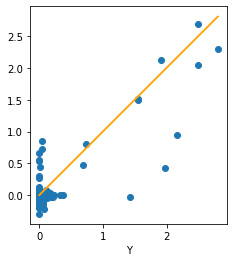

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict100.csv", prediction, delimiter=",")

[[ 6.63442016e-02]
 [ 4.29337621e-02]
 [ 2.40958333e-02]
 [ 1.77186131e-02]
 [ 4.48308587e-02]
 [ 1.11156166e-01]
 [-1.71586871e-02]
 [-3.29864621e-02]
 [ 4.84504104e-02]
 [ 5.07029891e-02]
 [ 6.78204894e-02]
 [ 8.70996714e-03]
 [ 6.56549335e-02]
 [ 4.85023856e-02]
 [ 6.20921254e-02]
 [-4.94605303e-03]
 [-8.30274820e-03]
 [-1.67785287e-02]
 [-1.40510619e-01]
 [ 4.25386429e-03]
 [-2.92554200e-01]
 [ 6.53024912e-02]
 [ 8.10853839e-02]
 [-1.04742646e-02]
 [-1.98734403e-02]
 [ 3.03773284e-02]
 [ 7.30666518e-02]
 [ 5.40823340e-02]
 [ 5.55819869e-02]
 [ 1.41405463e-02]
 [ 1.64279342e-02]
 [-1.20821595e-02]
 [ 3.39879394e-02]
 [ 5.28544784e-02]
 [-8.03619623e-03]
 [ 4.17232513e-03]
 [-2.12221742e-02]
 [ 1.05496645e-02]
 [ 2.69112825e-01]
 [ 6.33754134e-02]
 [ 8.28762650e-02]
 [-7.39386678e-02]
 [ 1.11262202e-02]
 [-2.29725242e-02]
 [-9.69607830e-02]
 [-3.83225083e-02]
 [ 2.68024206e-02]
 [ 8.49810123e-01]
 [-4.90053296e-02]
 [ 3.04296613e-02]
 [ 4.05009389e-02]
 [ 1.28993988e-02]
 [ 3.0364710